<h3>Group:1</h3>

---


**Name:** Samsil Arefeen <br>
**Id:** 2024-3-27-052 <br>
**Name:** Abyaz Tahif <br>
**Id:** 2024-3-27-035 <br>
**Name:** Ashim Zaman <br>
**Id:** 2024-3-27-043

# **Loading Dataset**

In [228]:
#Importing  Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Uploading dataset and setting coresponding path where csv file is located
df = pd.read_csv('/content/dataset (1).csv')  #Submit the path of the data set

# Displaying first few rows

In [229]:


# Displaying first 20 rows
df.head(20)

,Feature_1_Pressure,Feature_1_Temperature,Feature_2_Pressure,Feature_2_Temperature,Feature_3_Pressure,Feature_3_Temperature,Feature_4_Pressure,Feature_4_Temperature,Feature_5_Pressure,Feature_5_Temperature,...,Feature_26_Temperature,Feature_27_Pressure,Feature_27_Temperature,Feature_28_Pressure,Feature_28_Temperature,Feature_29_Pressure,Feature_29_Temperature,Feature_30_Pressure,Feature_30_Temperature,Class
0,949.816048,39.363552,994.465875,95.964021,800.982536,48.197457,939.466334,18.713988,NaN,NaN,...,50.818024,960.776242,55.865699,1108.987372,63.184000,859.960819,9.015330,NaN,NaN,4
1,1180.285723,47.343566,927.099026,18.502278,1137.075869,61.852319,951.791700,1.200098,1049.402940,43.708932,...,69.136553,1034.222830,88.356628,887.005288,91.799880,1086.002480,7.418545,1142.343883,18.561878,1
2,1092.797577,85.454739,855.910786,15.799423,907.256262,76.743931,1108.850508,66.911941,NaN,NaN,...,4.668803,1168.691112,60.141494,1187.457712,22.318452,960.864513,92.951876,954.632029,74.564257,0
3,1039.463394,34.000439,830.083516,71.341906,988.865627,66.561739,993.417141,57.900872,803.793457,67.735957,...,27.360191,1013.692933,86.601867,949.119701,37.440416,1088.749738,83.566464,1127.592690,60.739583,3
4,862.407456,86.964968,817.954274,7.455188,1136.627303,62.656664,953.182516,8.298198,1139.956686,12.401350,...,67.680905,NaN,NaN,1079.420412,91.778117,1108.260547,78.964338,995.338069,23.239570,2
5,NaN,NaN,864.718470,48.289146,1198.742459,37.167133,1078.349879,96.599643,979.600644,32.695221,...,0.696608,1032.703385,37.384593,NaN,NaN,1062.617157,77.036046,1139.972220,99.596029,4
6,823.233445,77.679844,812.057518,48.405312,1117.953402,63.007371,1038.805900,61.779320,988.374477,65.705021,...,NaN,957.546035,29.158711,1163.695410,95.554506,959.589708,60.781567,879.991056,62.628839,3
7,1146.470458,84.754763,NaN,NaN,809.933295,10.327287,831.253834,65.152098,943.985656,64.925281,...,NaN,NaN,NaN,NaN,NaN,1022.090603,61.708836,825.217111,63.418534,3
8,1040.446005,18.181765,899.445648,93.044374,947.501668,40.955812,NaN,NaN,NaN,NaN,...,79.828502,1106.512568,83.176695,NaN,NaN,1092.792023,84.565851,NaN,NaN,0
9,1083.229031,43.034653,947.496171,28.254344,898.884254,18.835128,1191.443251,33.706327,1090.220287,17.685686,...,73.557080,NaN,NaN,1025.490468,63.322013,NaN,NaN,NaN,NaN,3


In [230]:


# Overviewing the data set
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

Dataset shape: (5000, 61)

Data types:
Feature_1_Pressure        float64
Feature_1_Temperature     float64
Feature_2_Pressure        float64
Feature_2_Temperature     float64
Feature_3_Pressure        float64
                           ...   
Feature_29_Pressure       float64
Feature_29_Temperature    float64
Feature_30_Pressure       float64
Feature_30_Temperature    float64
Class                       int64
Length: 61, dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Feature_1_Pressure      4049 non-null   float64
 1   Feature_1_Temperature   4049 non-null   float64
 2   Feature_2_Pressure      4056 non-null   float64
 3   Feature_2_Temperature   4056 non-null   float64
 4   Feature_3_Pressure      4046 non-null   float64
 5   Feature_3_Temperature   4046 non-null   float64
 6   Feature_4_

# **Overview**

Dataset: 5,000 samples × 61 columns

Features: 30 sensors × 2 (Pressure + Temperature) = 60 float64 columns

Target: 1 int64 'Class' column (no missing values)

Completeness: 80-85% data completeness per column

Memory: 2.3 MB

Type: Numerical, ML-ready with minor imputation needed

In [231]:
# Show  missing values sum
print("Missing values:")
print(df.isnull().sum())



Missing values:
Feature_1_Pressure        951
Feature_1_Temperature     951
Feature_2_Pressure        944
Feature_2_Temperature     944
Feature_3_Pressure        954
                         ... 
Feature_29_Pressure       960
Feature_29_Temperature    960
Feature_30_Pressure       958
Feature_30_Temperature    958
Class                       0
Length: 61, dtype: int64


# **Missing Values:**

Total missing: ~950 values per column

Percentage: 19% missing in each feature column

Class: 0% missing (complete)

Completeness: ~81% data per feature

Pattern: Consistent missing rates across all 60 features

# Filling the null values by randomly sampling from the existing data range

In [232]:

# Function to fill null values with random samples from existing data
def fill_with_random_sample(df, column_name):
    if df[column_name].isnull().any():
        valid_values = df[column_name].dropna()  # Get non-null values
        if len(valid_values) > 0:
            # Get indices of null values
            null_indices = df[df[column_name].isnull()].index
            # Randomly sample from existing values
            random_sample = np.random.choice(valid_values, size=len(null_indices), replace=True)
            # Fill null values with random samples
            df.loc[null_indices, column_name] = random_sample
    return df

# Apply the function to each column
for col in df.columns:
    df = fill_with_random_sample(df, col)

print("After Filling null values, the null value count are below")
print(df.isnull().sum())


After Filling null values, the null value count are below
Feature_1_Pressure        0
Feature_1_Temperature     0
Feature_2_Pressure        0
Feature_2_Temperature     0
Feature_3_Pressure        0
                         ..
Feature_29_Pressure       0
Feature_29_Temperature    0
Feature_30_Pressure       0
Feature_30_Temperature    0
Class                     0
Length: 61, dtype: int64


**Replacing null values by randomly sampling:**

Missing values (19% per feature) break ML models.

Replacing these values with random sampling maintains the original data's variance, range, and shape.

Benefits: Reflects real-world variability, preserve patterns for accurate analysis/modeling.

Limitation: It treats each feature independently, ignoring correlations between variables that could provide more accurate imputation.



# **Exploratory Data Analysis**

In [233]:
# Summary statistics
df.describe()



,Feature_1_Pressure,Feature_1_Temperature,Feature_2_Pressure,Feature_2_Temperature,Feature_3_Pressure,Feature_3_Temperature,Feature_4_Pressure,Feature_4_Temperature,Feature_5_Pressure,Feature_5_Temperature,...,Feature_26_Temperature,Feature_27_Pressure,Feature_27_Temperature,Feature_28_Pressure,Feature_28_Temperature,Feature_29_Pressure,Feature_29_Temperature,Feature_30_Pressure,Feature_30_Temperature,Class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,998.417963,48.949989,999.080085,50.558383,997.172582,50.300108,1000.320177,49.896085,1002.116629,50.872786,...,49.789057,1000.880625,50.183529,998.795190,49.821834,998.455508,51.009973,997.744566,49.754669,2.008200
std,116.603444,28.469914,116.204830,28.930054,115.735199,29.141592,115.571236,28.776426,115.164176,28.554738,...,28.963215,115.098866,28.526451,114.821119,28.727850,113.963452,28.959126,115.632908,29.097570,1.419202
min,800.004654,0.005283,800.003718,0.002052,800.081266,0.009327,800.003373,0.032323,800.068502,0.013001,...,0.006920,800.031197,0.033248,800.224710,0.002713,800.098523,0.026647,800.231079,0.012149,0.000000
25%,898.003697,24.580152,898.598235,25.597812,897.787586,25.131176,901.143724,25.350946,902.024898,25.750965,...,25.209723,901.684077,25.469817,902.656984,25.067558,902.791737,25.876141,899.366365,24.115155,1.000000
50%,997.097938,48.612885,998.017730,50.629389,994.625500,50.272014,1002.792258,49.652988,1001.531367,51.834113,...,49.476934,1001.282069,50.434180,998.344587,49.701080,998.592625,51.884484,995.245653,49.477457,2.000000
75%,1100.106306,72.847669,1101.796546,75.405925,1096.827792,75.870173,1100.855702,74.941336,1103.783386,75.047274,...,74.909556,1100.308183,74.370969,1096.736412,74.651916,1094.891489,76.073351,1098.338414,74.895033,3.000000
max,1199.887069,99.950519,1199.877933,99.989106,1199.959874,99.979711,1199.907586,99.993970,1199.932527,99.984265,...,99.979621,1199.840395,99.940203,1199.996470,99.797824,1199.983021,99.975553,1199.927272,99.944947,4.000000


# Summary Statistics:

Pressure: ~800-1200 (wide spread)

Temperature: ~0-100 (consistent scale)

Missing: 0% per feature →  Random Hot Deck Imputation applied

Class: 5 categories (0-4) balanced distribution

Readiness: Clean numeric data, ML-ready

# Data **Visualization**
Since the mean and sd for both pressure and temparature is indentical for all features and they all follow uniform distribution we only took 1 feature to show relationship.

/tmp/ipython-input-1266281738.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', ax=axes[2], palette='viridis')


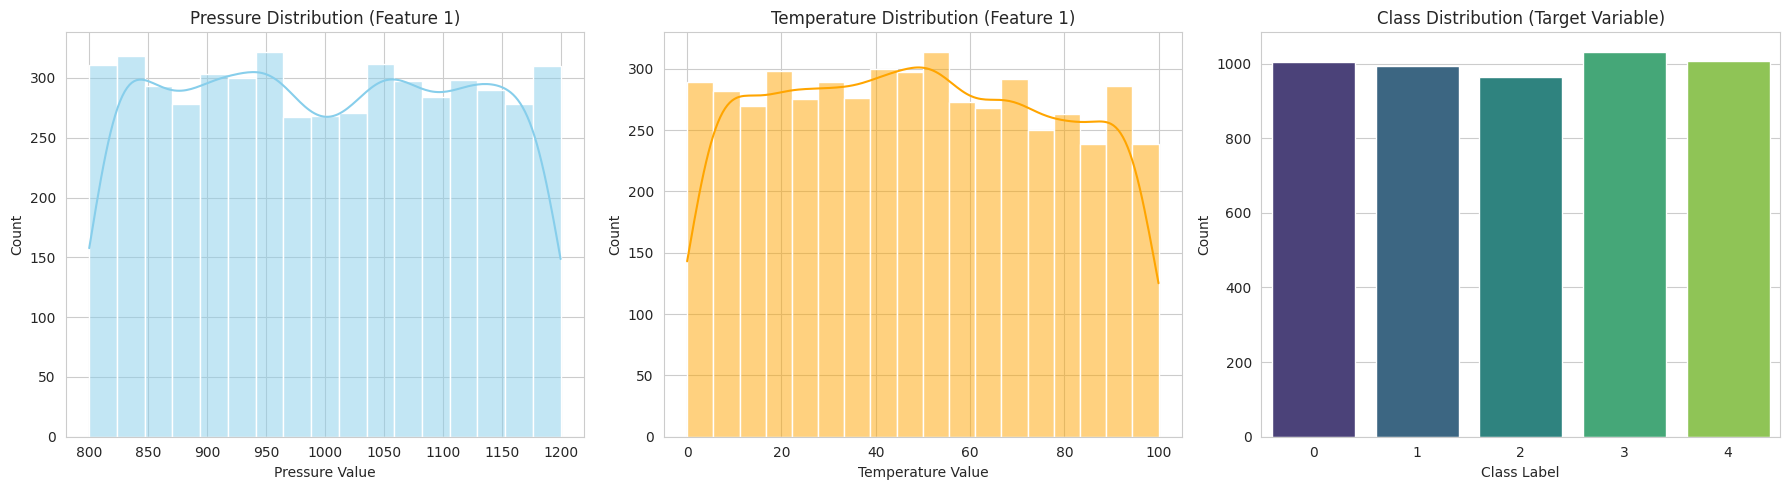

In [234]:

#Histogram

# Seting a nice visual style
sns.set_style("whitegrid")

# Creating a figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1:Pressure Feature
# We used Feature_1_Pressure as a representative example(Why taken single feature,explained in text below)
sns.histplot(data=df, x='Feature_1_Pressure', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Pressure Distribution (Feature 1)')
axes[0].set_xlabel('Pressure Value')

# Plot 2:Temperature Feature
# We used Feature_1_Temperature as a representative example
sns.histplot(data=df, x='Feature_1_Temperature', kde=True, ax=axes[1], color='orange')
axes[1].set_title('Temperature Distribution (Feature 1)')
axes[1].set_xlabel('Temperature Value')

# Plot 3: Class Distribution
# Used a countplot to see how many samples are in each class
sns.countplot(data=df, x='Class', ax=axes[2], palette='viridis')
axes[2].set_title('Class Distribution (Target Variable)')
axes[2].set_xlabel('Class Label')
axes[2].set_ylabel('Count')

# Save and Showing the plot
plt.tight_layout()
plt.savefig('data_histograms.png')
plt.show()

# Key Insights from Histogram
As we can see from the histrogram based on pressure ,temparature and distribution by class, they all follow uniform shape.

 It means the values are almost evenly spread between all range.

/tmp/ipython-input-3133017907.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Feature_1_Pressure', data=df, ax=axes[1, 0], palette='viridis')
/tmp/ipython-input-3133017907.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Feature_1_Temperature', data=df, ax=axes[1, 1], palette='plasma')


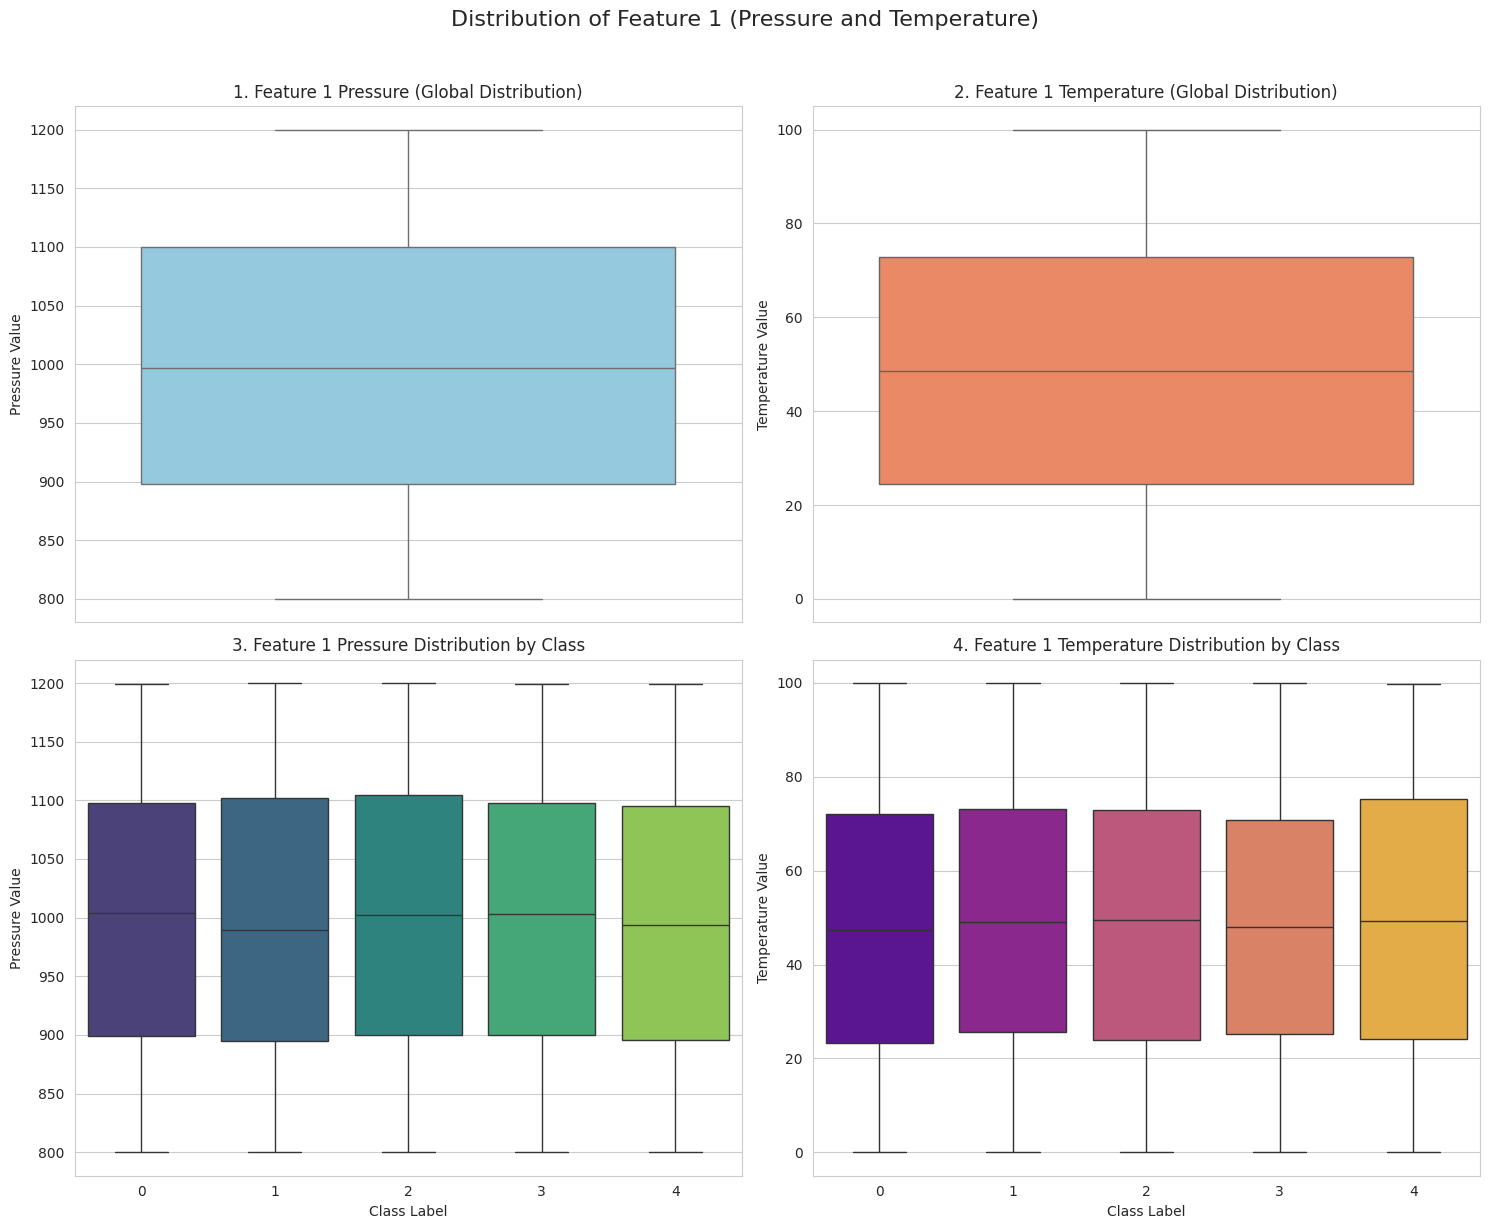

In [235]:
#Box Plot

# Ensuring 'Class' is treated as categorical
df['Class'] = df['Class'].astype('category')

# Set up the figure for 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Feature 1 (Pressure and Temperature)', fontsize=16, y=1.02)

# Row 1: Overall/Global Distribution (1 boxplot each)

# Plot 1: Feature_1_Pressure (Overall)
# We use dropna() to handle missing values
sns.boxplot(y=df['Feature_1_Pressure'].dropna(), ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('1. Feature 1 Pressure (Global Distribution)')
axes[0, 0].set_ylabel('Pressure Value')
axes[0, 0].set_xlabel('')

# Plot 2: Feature_1_Temperature (Overall)
sns.boxplot(y=df['Feature_1_Temperature'].dropna(), ax=axes[0, 1], color='coral')
axes[0, 1].set_title('2. Feature 1 Temperature (Global Distribution)')
axes[0, 1].set_ylabel('Temperature Value')
axes[0, 1].set_xlabel('')

#Row 2: Distribution Grouped by Class (5 boxplots each)

# Plot 3: Feature_1_Pressure (Grouped by Class)
sns.boxplot(x='Class', y='Feature_1_Pressure', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('3. Feature 1 Pressure Distribution by Class')
axes[1, 0].set_ylabel('Pressure Value')
axes[1, 0].set_xlabel('Class Label')

# Plot 4: Feature_1_Temperature (Grouped by Class)
sns.boxplot(x='Class', y='Feature_1_Temperature', data=df, ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('4. Feature 1 Temperature Distribution by Class')
axes[1, 1].set_ylabel('Temperature Value')
axes[1, 1].set_xlabel('Class Label')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('feature_1_boxplots_by_class.png')

#Key Insights from Boxplot

*   Outlier Check: The boxplots confirm there are no significant outliers present in the data, globally or within any specific class
*   Pattern Consistency: The sensor reading pattern—specifically the mean and spread (variance)—is identical across all five classes.

*   Classification Basis: This means the class labels are not defined by how high or low a single sensor reads.
*   Model Implication: The classification task must rely on a complex, non-linear interaction or combination of all 60 sensors working together.



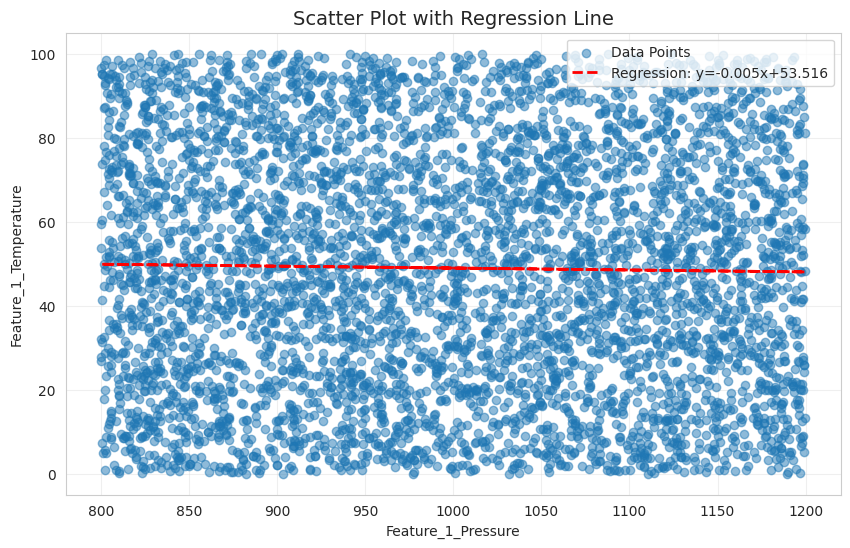

Correlation coefficient: -0.019


In [236]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['Feature_1_Pressure'], df['Feature_1_Temperature'],
           alpha=0.5, label='Data Points')

# Calculate and plot regression line
x = df['Feature_1_Pressure'].dropna()
y = df['Feature_1_Temperature'].dropna()
z = np.polyfit(x, y, 1)  # Linear regression
p = np.poly1d(z)

# Plot regression line
plt.plot(x, p(x), "r--", linewidth=2, label=f'Regression: y={z[0]:.3f}x+{z[1]:.3f}')

plt.title('Scatter Plot with Regression Line', fontsize=14)
plt.xlabel('Feature_1_Pressure')
plt.ylabel('Feature_1_Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation coefficient: {df['Feature_1_Pressure'].corr(df['Feature_1_Temperature']):.3f}")

# Key Insight from Scatter plot

The scatter plot reveals no meaningful relationship between pressure and temperature (r ~ -0.02).

The regression slope is negligible ~(-0.004), indicating pressure changes have virtually no effect on temperature.

<h1>Correlation Analysis (Between Features) </h1>

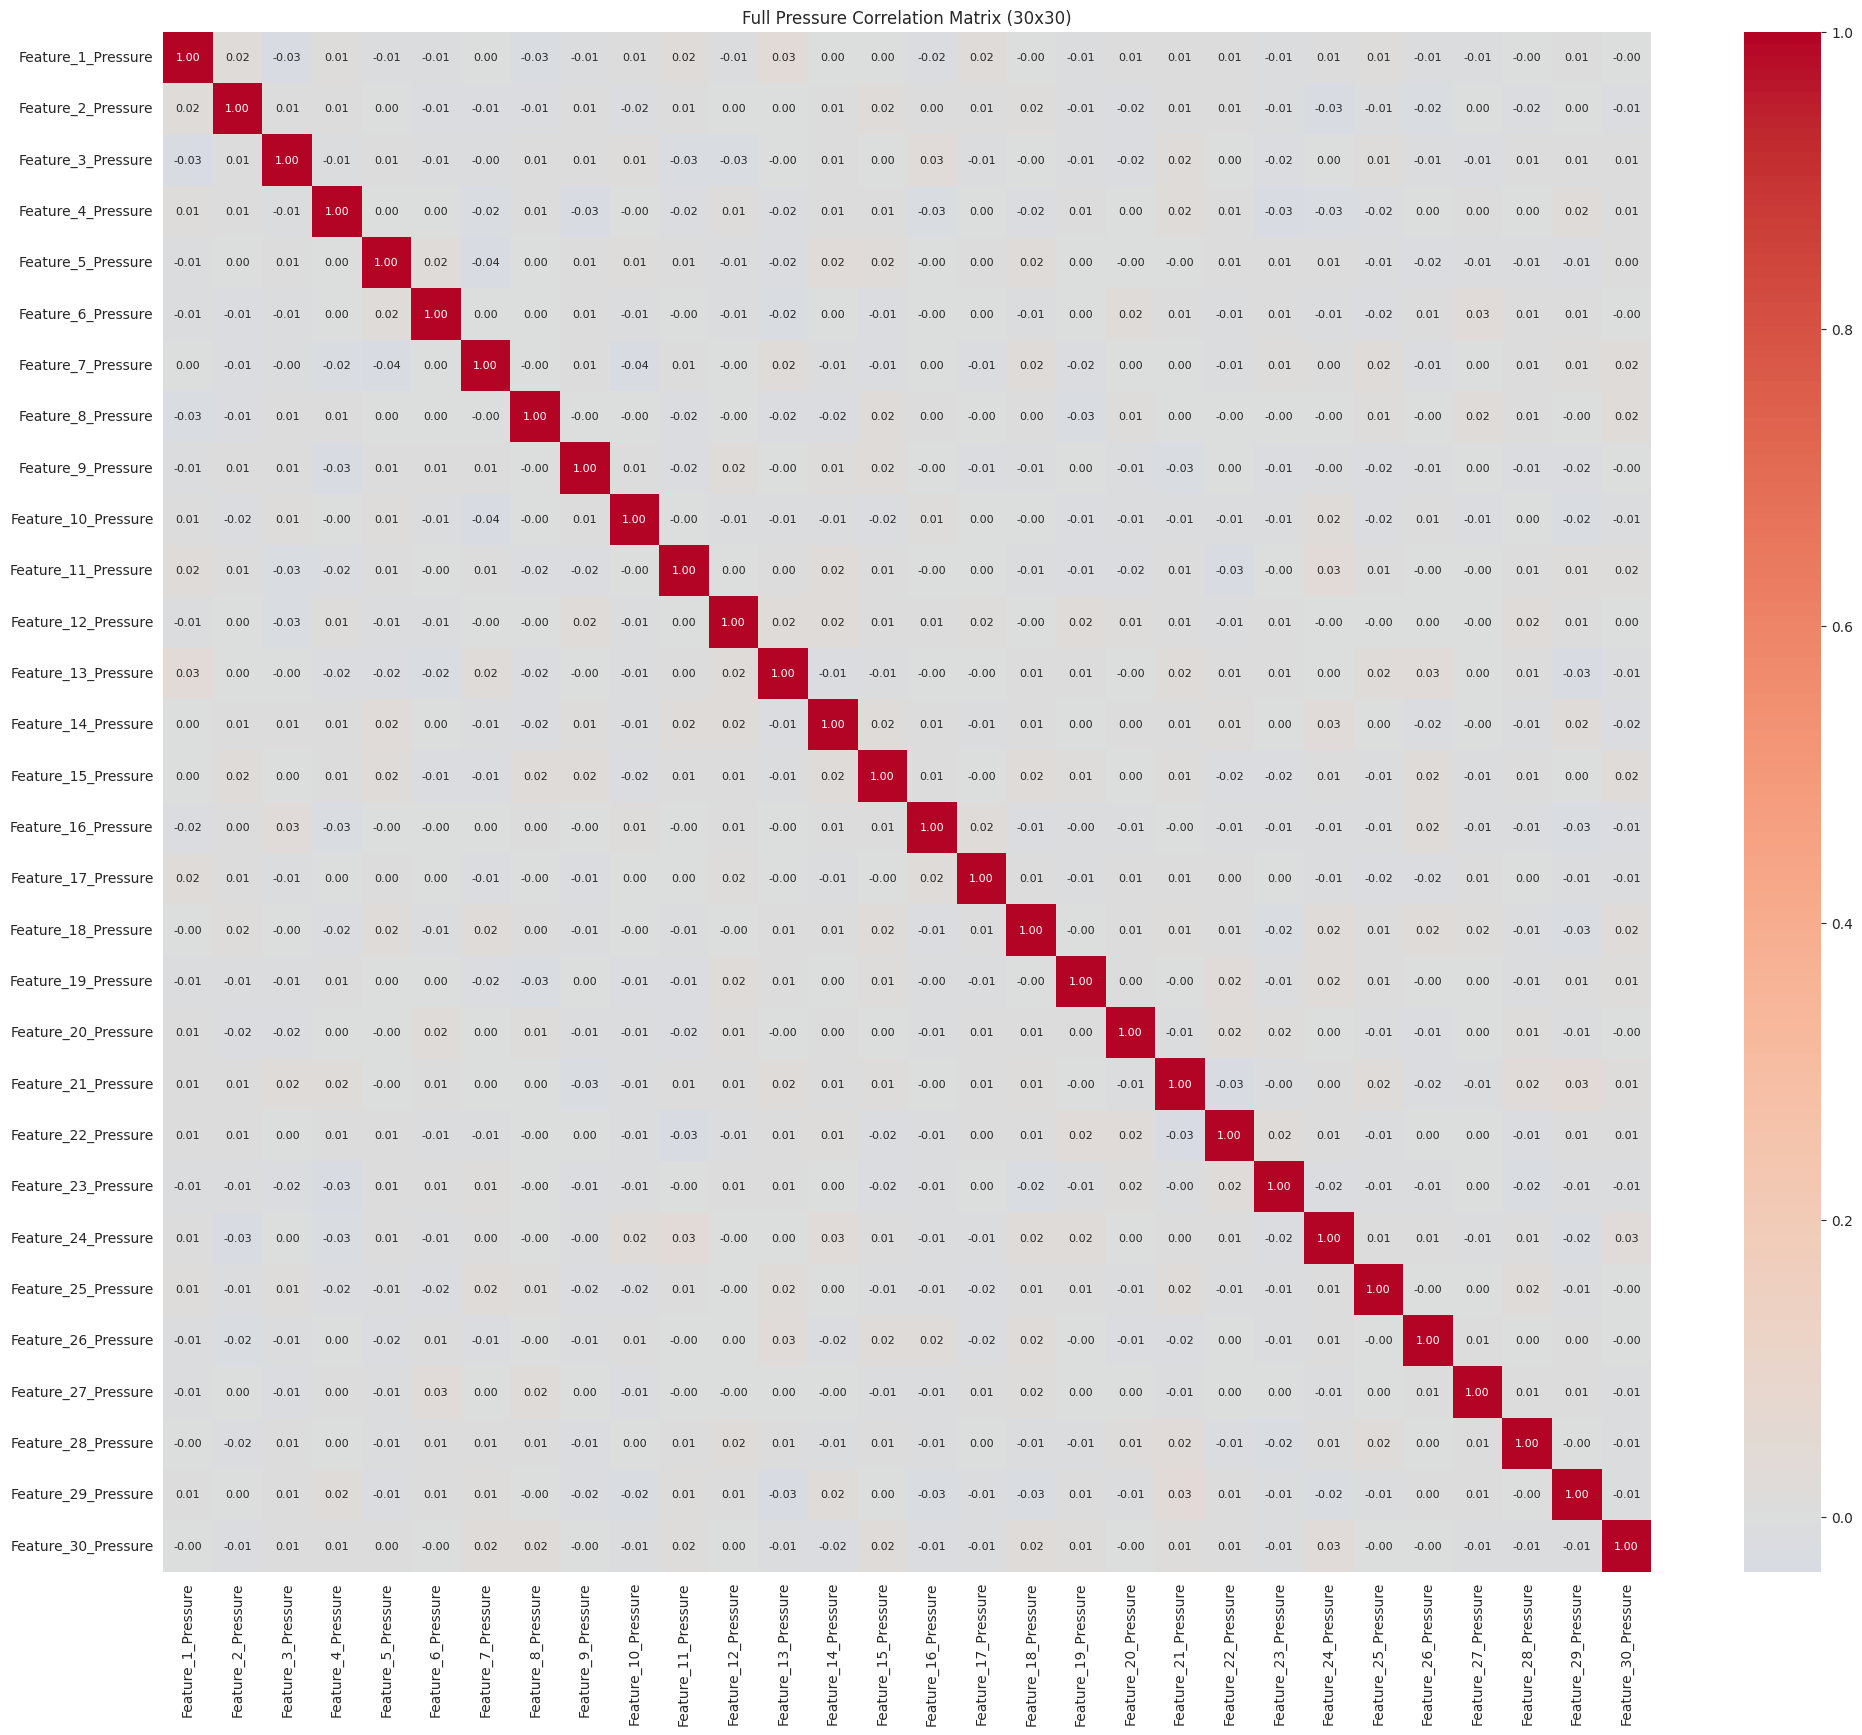

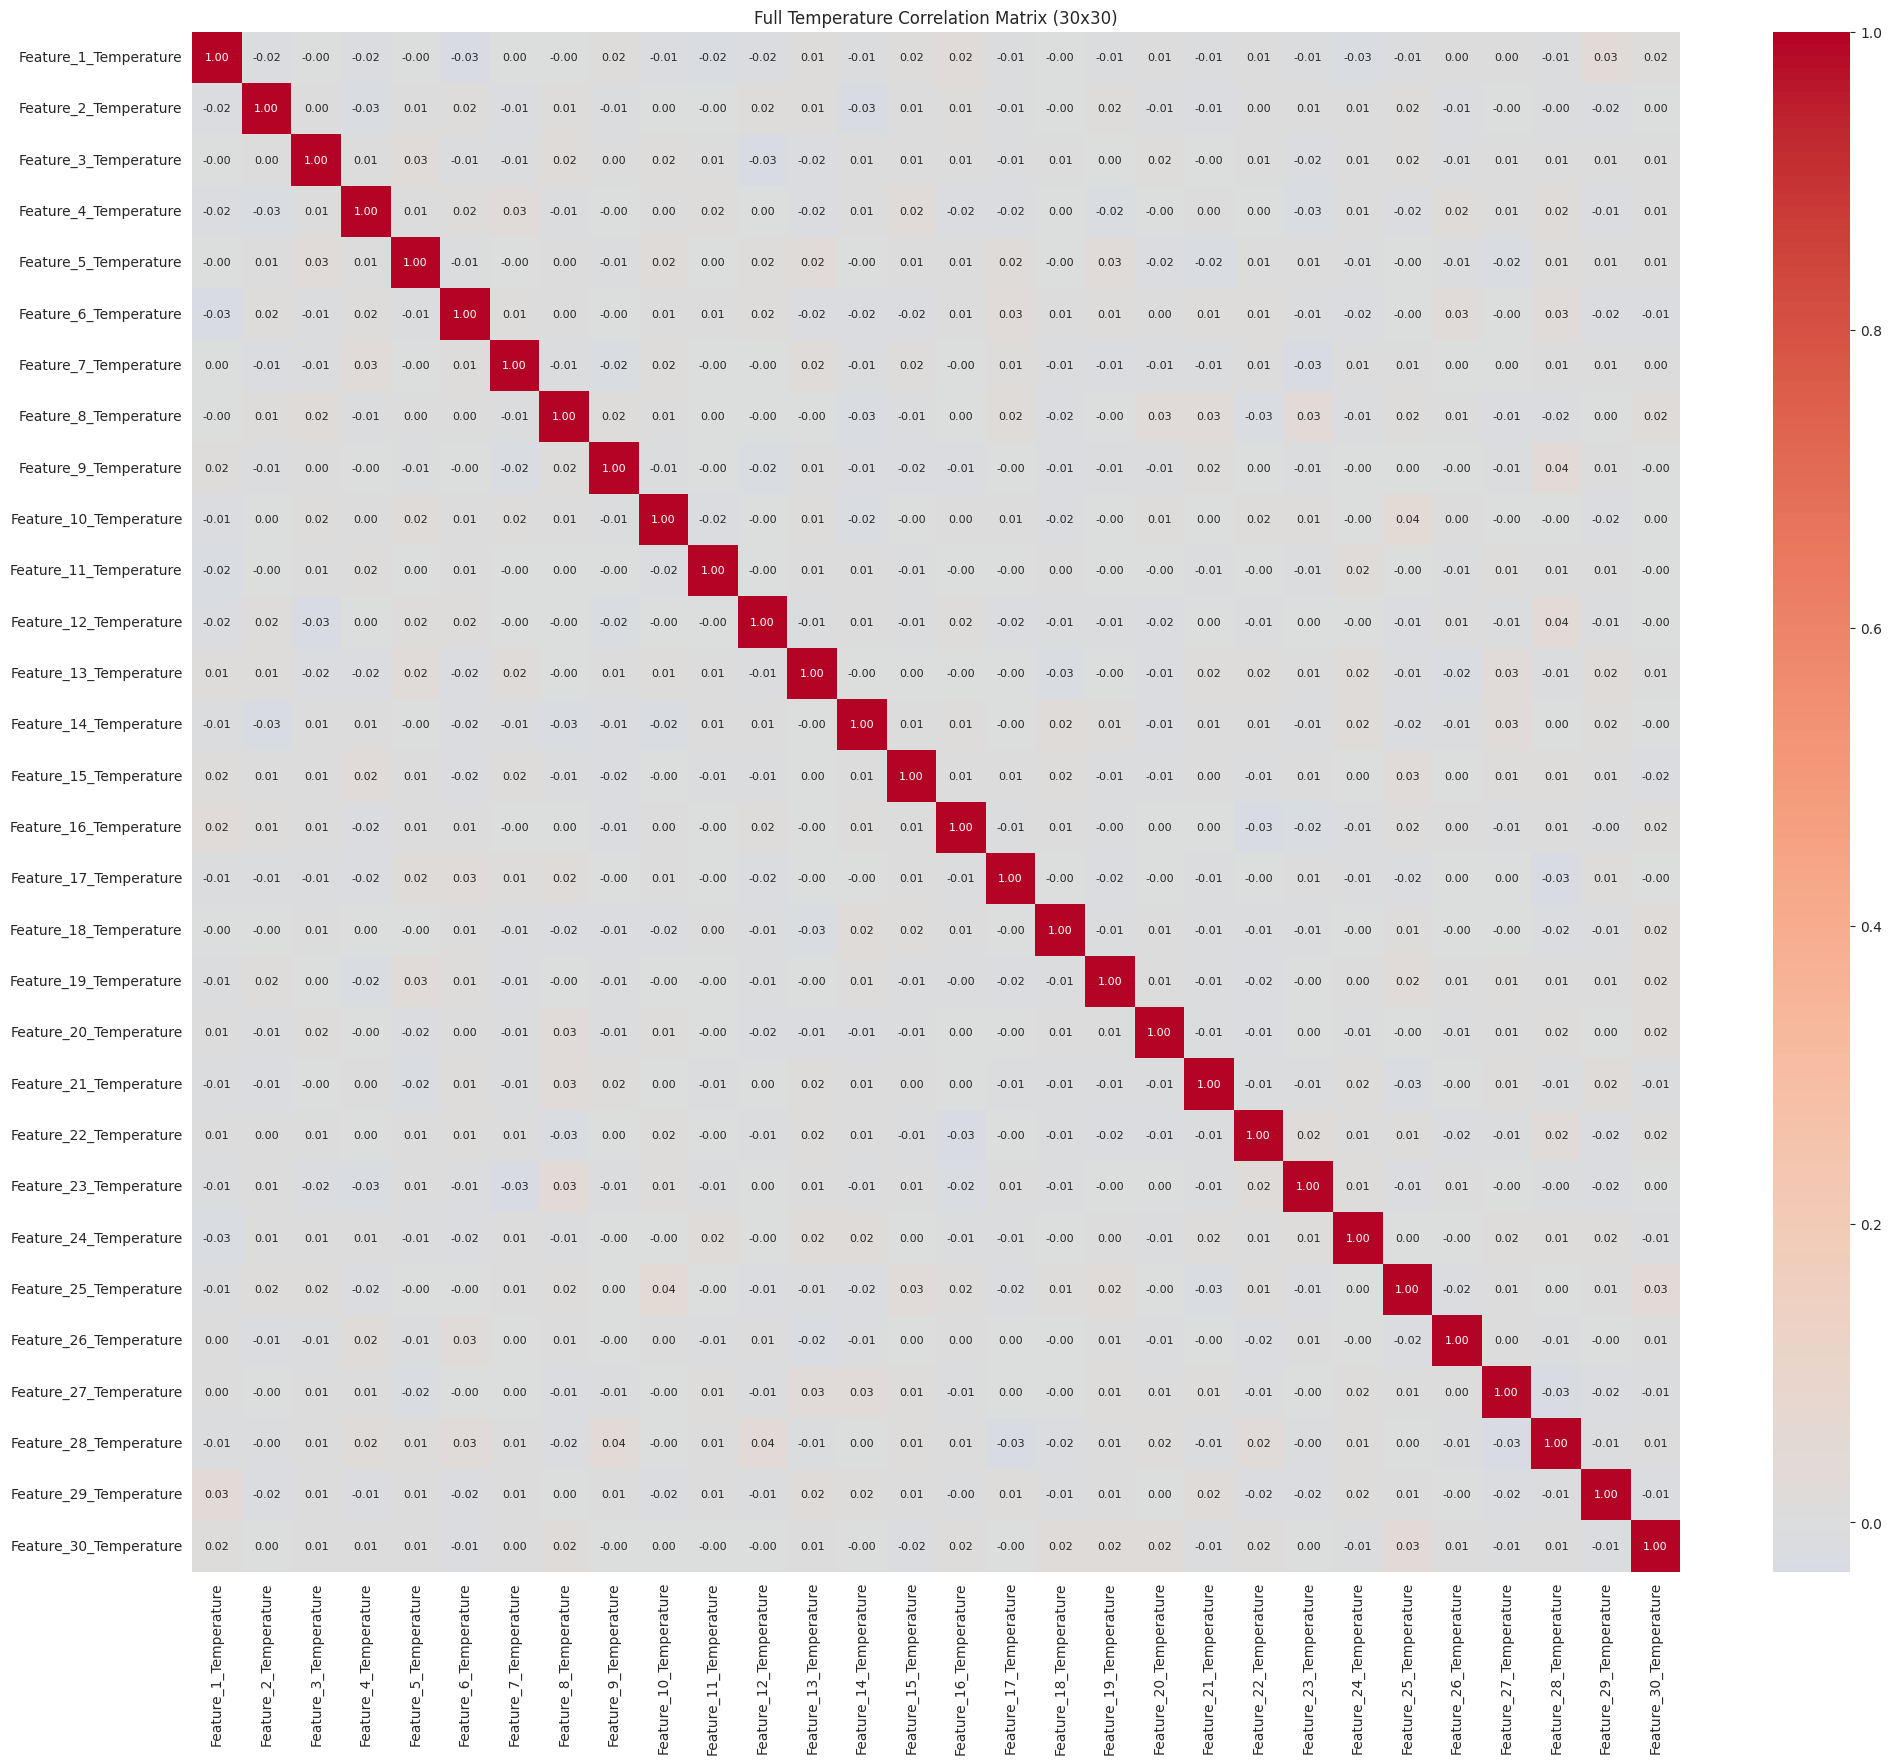

In [237]:
# Define column groups
pressure_cols = [f'Feature_{i}_Pressure' for i in range(1, 31)]
temp_cols = [f'Feature_{i}_Temperature' for i in range(1, 31)]

# 1. Plot Pressure Matrix (Vertical Page 1)
plt.figure(figsize=(24, 20))  # Huge size for readability
sns.heatmap(df[pressure_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, annot_kws={"size": 8})
plt.title('Full Pressure Correlation Matrix (30x30)')
plt.savefig('pressure_corr_full.png')
plt.show()

# 2. Plot Temperature Matrix (Vertical Page 2)
plt.figure(figsize=(24, 20))
sns.heatmap(df[temp_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, annot_kws={"size": 8})
plt.title('Full Temperature Correlation Matrix (30x30)')
plt.savefig('temperature_corr_full.png')
plt.show()

<h3>Key Insights From Correlation Analysis(Between Features)</h3>
<p>As we see from the heatmap, we compared feature to feature pressure correlation and then feature to feature temparature correlation.


*  For pressure correlation , all the correlation between features are in between -0.044 to +0.054 which suggest pretty weak correlation.
*   For temparature correlation , all the correlation between features are in between -0.049 to +0.054 which also suggest pretty weak correlation.<br>
<br>**Conclusion:** Since all values are extremely close to 0, we can conclude that there is no linear correlation between the features.
</p>

<h1>Correlation Analysis(Grouped by class)</h1>

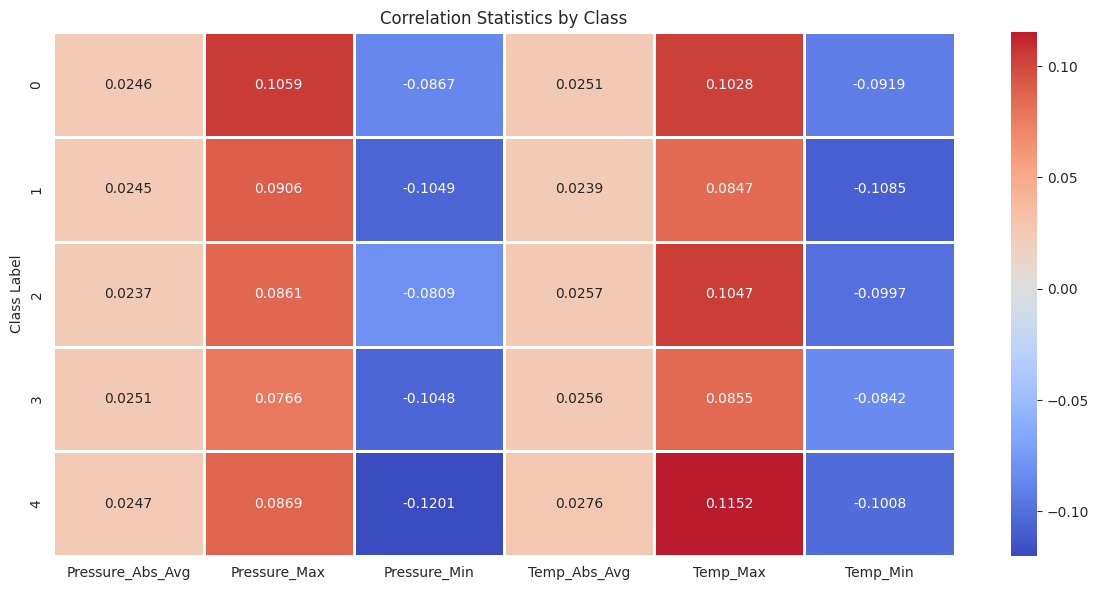

In [238]:
# Identifing Columns
pressure_cols = [c for c in df.columns if 'Pressure' in c]
temp_cols = [c for c in df.columns if 'Temperature' in c]

#Calculating Stats per Class
results = []
for cls in sorted(df['Class'].unique()):
    df_cls = df[df['Class'] == cls]

    # Pressure Stats
    p_corr = df_cls[pressure_cols].corr()
    mask_p = np.triu(np.ones_like(p_corr, dtype=bool), k=1)
    p_vals = p_corr.where(mask_p).stack()

    # Temp Stats
    t_corr = df_cls[temp_cols].corr()
    mask_t = np.triu(np.ones_like(t_corr, dtype=bool), k=1)
    t_vals = t_corr.where(mask_t).stack()

    results.append({
        'Class': cls,
        'Pressure_Abs_Avg': p_vals.abs().mean(),
        'Pressure_Max': p_vals.max(),
        'Pressure_Min': p_vals.min(),
        'Temp_Abs_Avg': t_vals.abs().mean(),
        'Temp_Max': t_vals.max(),
        'Temp_Min': t_vals.min()
    })

summary_df = pd.DataFrame(results).set_index('Class')

# Generating Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(summary_df, annot=True, fmt=".4f", cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Statistics by Class')
plt.ylabel('Class Label')
plt.tight_layout()
plt.savefig('class_correlation_heatmap.png')
plt.show()


<h3>Key Insights from correlation analysis by class</h3>
Despite the average absolute correlation remaining near zero ($\approx 0.03$), analyzing subgroups reveals instances where the maximum correlation strength increases threefold (from $\approx 0.05$ global to $\approx 0.17$ local), suggesting minimal class-specific dependencies.
<br><br>

# 📝 Overall Conclusion

### 🔍 What We Found
* **Identical Behavior:** Every single sensor follows the exact same pattern. All 30 pressure sensors are statistically identical (flat/uniform distribution), and all 30 temperature sensors are statistically identical.
* **Complete Independence:** There is effectively zero correlation between any of the sensors. A change in one sensor does not relate to a change in any other sensor.
* **Indistinguishable Classes:** When we grouped the data by Class (0–4), the behavior didn't change. The average value and the spread of data for "Class 0" are exactly the same as for "Class 4".

### 💡 What It Means
* **No Simple Rules:** You cannot classify this data by looking at simple thresholds (e.g., "High Pressure = Class 1"). The raw values alone do not tell you which class a sample belongs to.
* **Hidden Pattern:** Since the individual features don't show a clear signal, the "Class" label is likely determined by a complex, hidden rule involving the combination of multiple sensors, rather than any obvious trend in the data itself.